In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
data= pd.read_csv("./Top_12_German_Companies NEW.csv")
data

,Company,Period,Revenue,Net Income,Liabilities,Assets,Equity,ROA (%),ROE (%),Debt to Equity,percentage Debt to Equity
0,Volkswagen AG,12/31/2017,9750496618,5.168898e+08,21354201295,54861302788,33507101493,942.175.618,1.542.627.668,637.303.746,"0,00%"
1,Siemens AG,12/31/2017,19716237464,1.276840e+09,45009303223,75268101508,30258798286,1.696.389.282,4.219.731.382,1.487.478.214,"283,68%"
2,Allianz SE,12/31/2017,19458831198,1.600107e+09,48538978480,69583711255,21044732775,2.299.542.624,7.603.361.452,2.306.466.848,"329,65%"
3,BMW AG,12/31/2017,18808147150,9.601843e+08,35382107627,67327482638,31945375011,142.614.028,3.005.706.927,1.107.581.539,"0,00%"
4,BASF SE,12/31/2017,16895580815,1.797082e+09,28309420014,68036567115,39727147101,2.641.347.127,4.523.561.449,71.259.635,"634,80%"
...,...,...,...,...,...,...,...,...,...,...,...
379,SAP SE,9/30/2024,10824151396,8.302800e+08,42369695133,72342104340,29972409208,114.771.336,2.770.147.673,1.413.623.271,"0,00%"
380,Bayer AG,9/30/2024,9332023907,7.466675e+08,23673143006,42677324477,19004181470,1.749.565.031,3.928.964.508,1.245.680.749,"0,00%"
381,Deutsche Bank AG,9/30/2024,18549946525,2.323022e+09,49199711543,64461554635,15261843092,3.603.732.773,1.522.111.161,3.223.707.074,"472,16%"
382,Porsche AG,9/30/2024,15911174550,1.241694e+09,36125130235,84583217359,48458087124,1.468.014.459,2.562.407.917,745.492.288,"343,72%"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     384 non-null    object 
 1   Period                      384 non-null    object 
 2   Revenue                     384 non-null    int64  
 3   Net Income                  384 non-null    float64
 4   Liabilities                 384 non-null    int64  
 5   Assets                      384 non-null    int64  
 6   Equity                      384 non-null    int64  
 7   ROA (%)                     384 non-null    object 
 8   ROE (%)                     384 non-null    object 
 9   Debt to Equity              384 non-null    object 
 10  percentage  Debt to Equity  384 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 33.1+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,384.0,1.270992e+10,4.095183e+09,5.149850e+09,9.315161e+09,1.266963e+10,1.621724e+10,1.990964e+10
Net Income,384.0,1.249025e+09,5.445441e+08,2.980309e+08,8.643813e+08,1.145476e+09,1.560234e+09,2.884007e+09
Liabilities,384.0,3.115579e+10,1.139538e+10,1.004637e+10,2.085174e+10,3.230659e+10,4.088942e+10,4.976940e+10
Assets,384.0,6.141624e+10,1.698922e+10,2.177324e+10,5.074013e+10,6.020715e+10,7.369075e+10,9.657402e+10
Equity,384.0,3.026045e+10,1.172803e+10,1.001762e+10,1.966813e+10,2.999063e+10,3.984646e+10,4.991812e+10


In [5]:
data.isnull().sum()

Company                       0
Period                        0
Revenue                       0
Net Income                    0
Liabilities                   0
Assets                        0
Equity                        0
ROA (%)                       0
ROE (%)                       0
Debt to Equity                0
percentage  Debt to Equity    0
dtype: int64

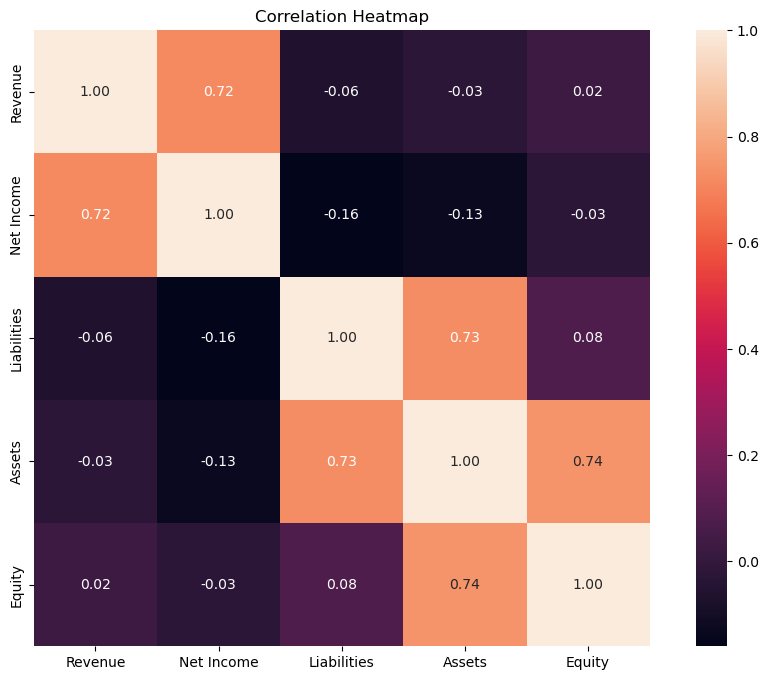

In [6]:
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Select numeric columns
correlation_matrix = numeric_data.corr()  # Compute correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f',  square=True)
plt.title('Correlation Heatmap')
plt.show()

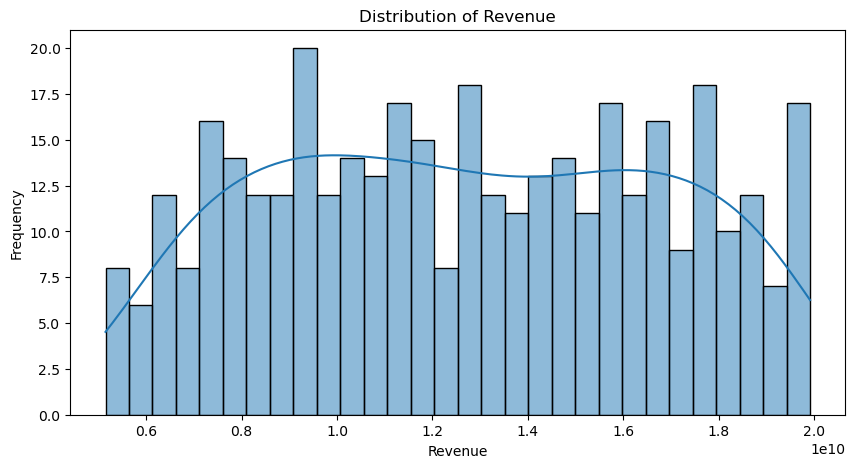

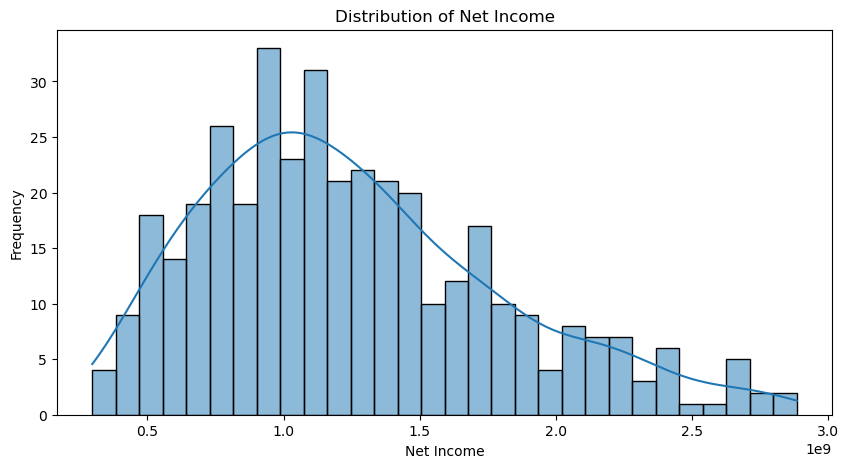

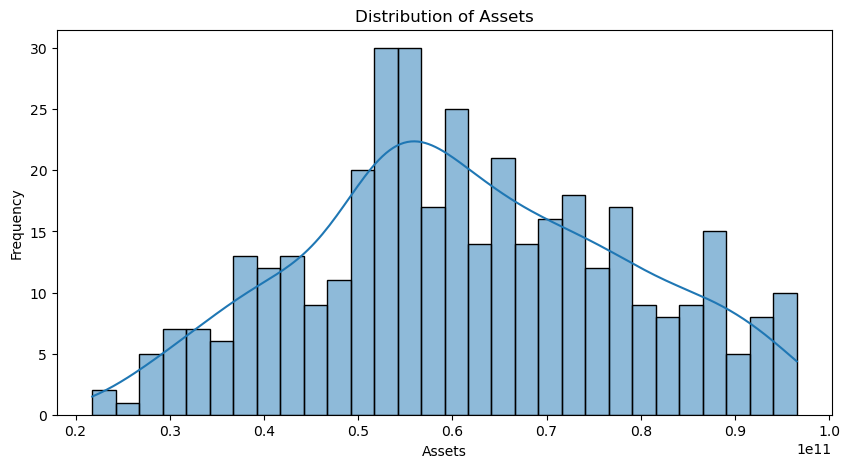

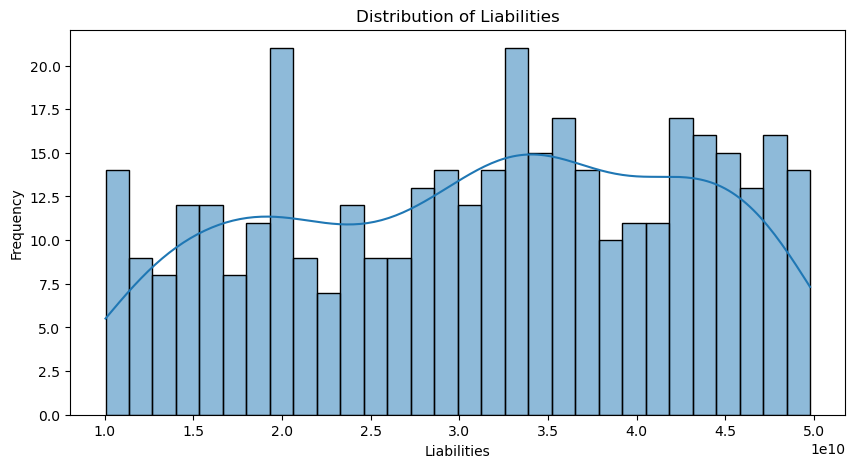

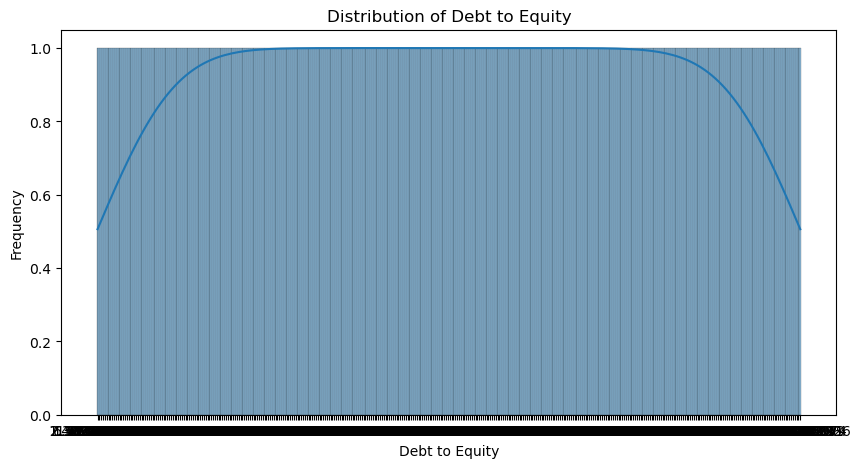

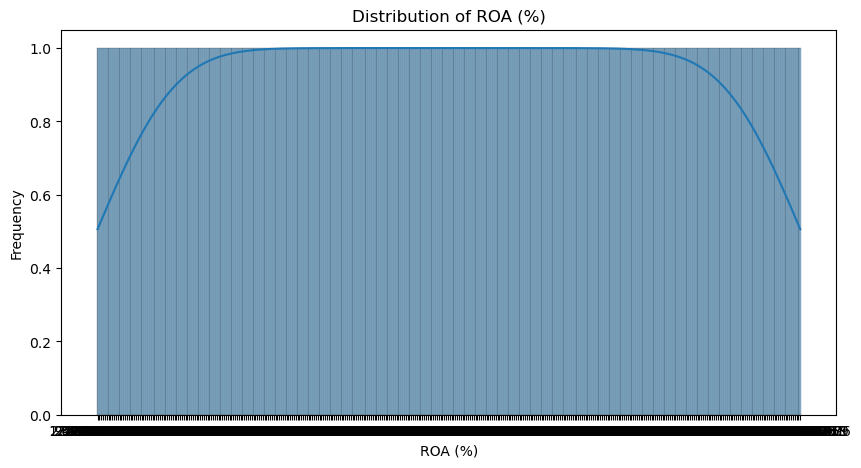

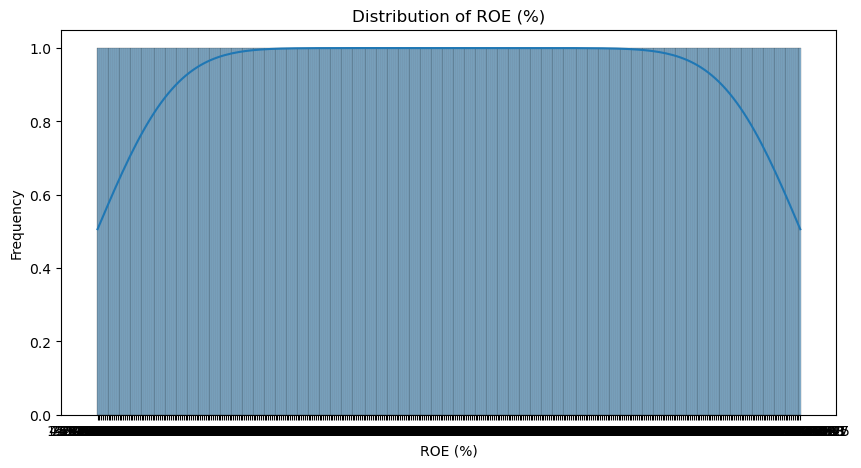

In [7]:
columns_to_plot = ['Revenue', 'Net Income', 'Assets', 'Liabilities', 'Debt to Equity', 'ROA (%)', 'ROE (%)']
for col in columns_to_plot:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_30052\262019692.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Company', y='Revenue', estimator=sum, ci=None)


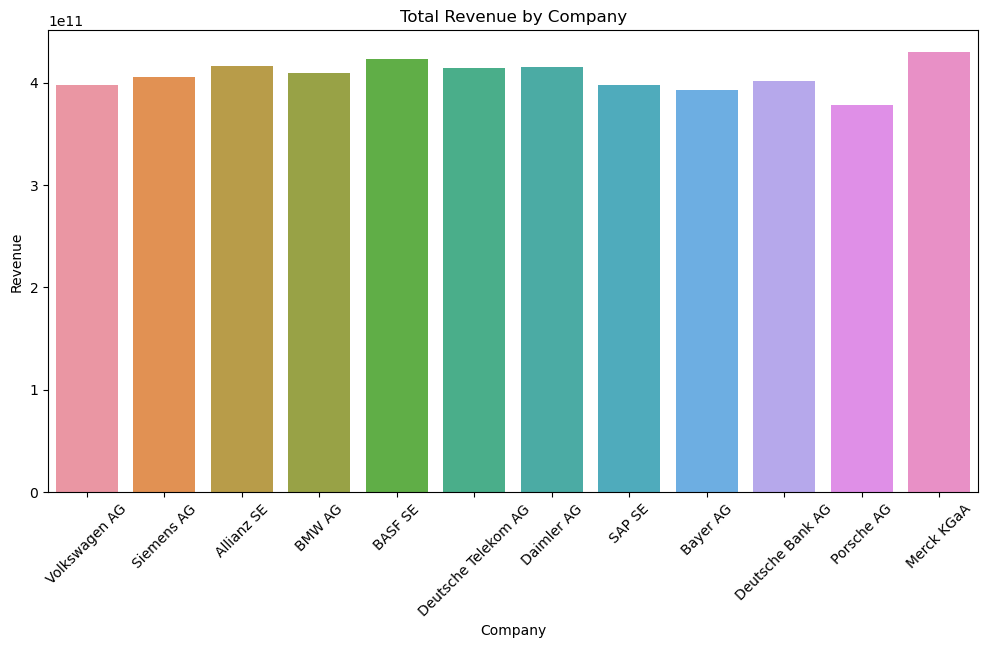

C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_30052\262019692.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Company', y='Net Income', estimator=sum, ci=None)


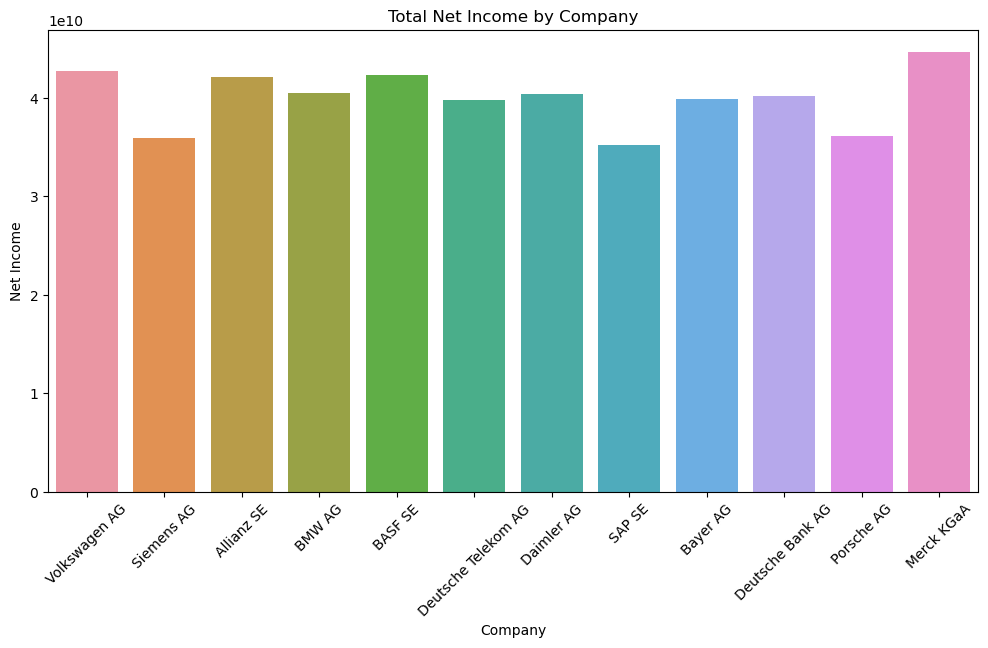

C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_30052\262019692.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Company', y='Assets', estimator=sum, ci=None)


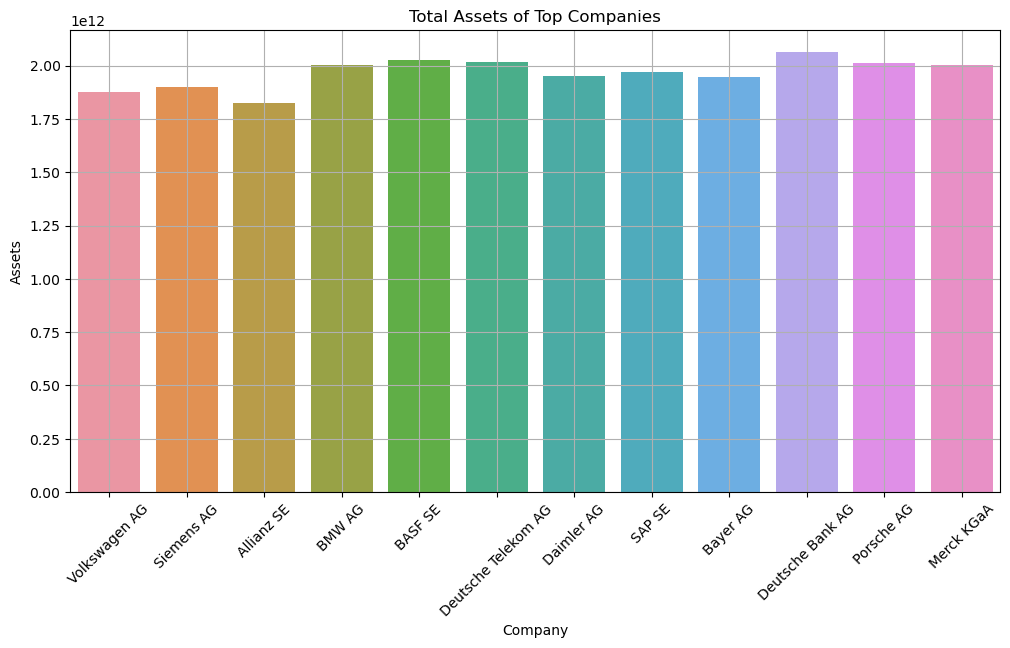

C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_30052\262019692.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Company', y='Liabilities', estimator=sum, ci=None)


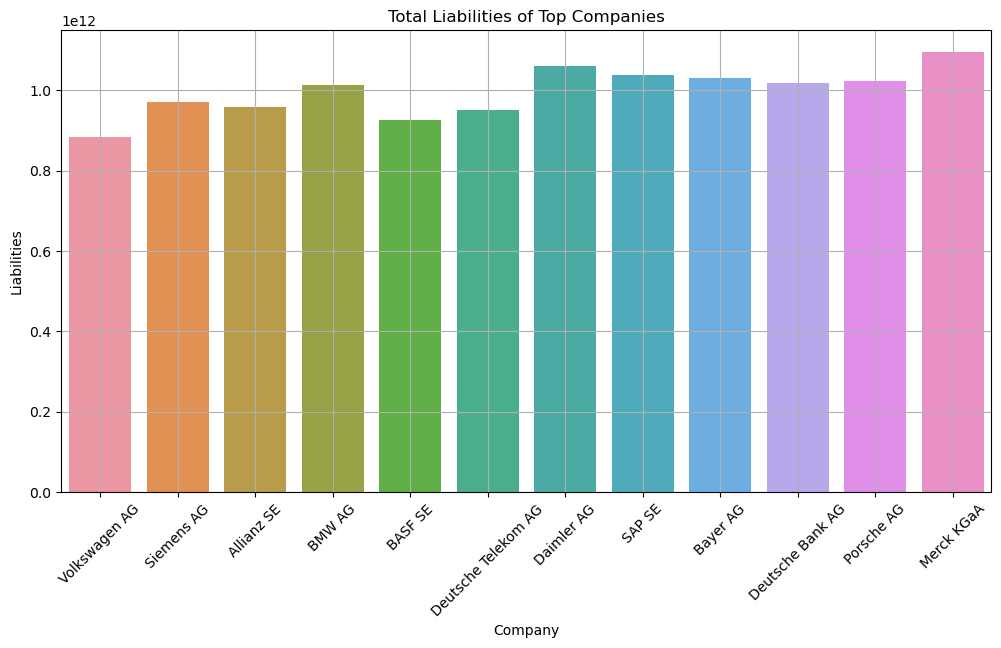

In [8]:

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Company', y='Revenue', estimator=sum, ci=None)
plt.title("Total Revenue by Company")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Company', y='Net Income', estimator=sum, ci=None)
plt.title("Total Net Income by Company")
plt.ylabel("Net Income")
plt.xticks(rotation=45)
plt.show()

# Assets and Liabilities
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Company', y='Assets', estimator=sum, ci=None)
plt.title("Total Assets of Top Companies")
plt.ylabel("Assets")
plt.xlabel("Company")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Company', y='Liabilities', estimator=sum, ci=None)
plt.title("Total Liabilities of Top Companies")
plt.ylabel("Liabilities")
plt.xlabel("Company")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



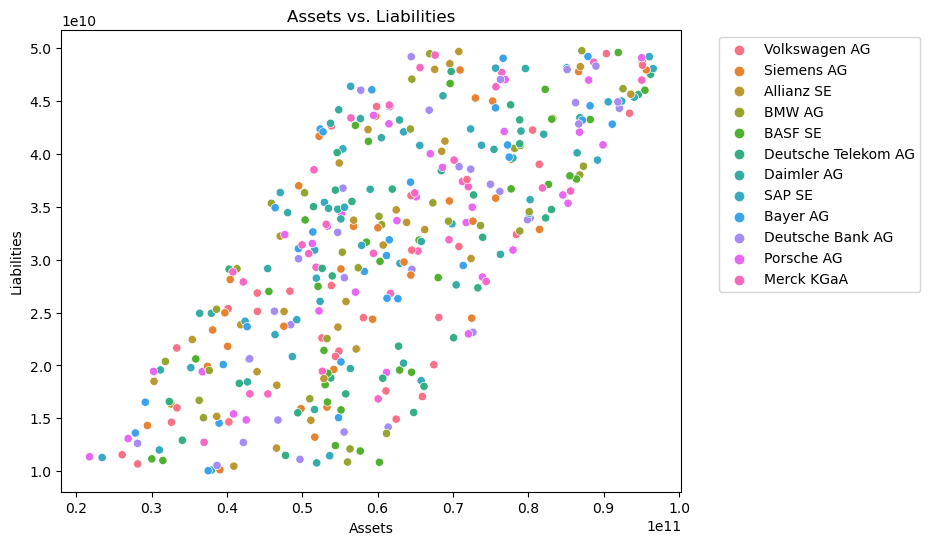

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Assets', y='Liabilities', hue='Company')
plt.title("Assets vs. Liabilities")
plt.xlabel("Assets")
plt.ylabel("Liabilities")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [10]:
# Convert the Period column to datetime format
data['Period'] = pd.to_datetime(data['Period'], format='%m/%d/%Y')

# Time Series Analysis
# Aggregate metrics over time (sum Revenue and Net Income by Period)
time_series_data = data.groupby('Period').agg({
    'Revenue': 'sum',
    'Net Income': 'sum',
    'Liabilities': 'sum',
    'Assets': 'sum'
}).reset_index()

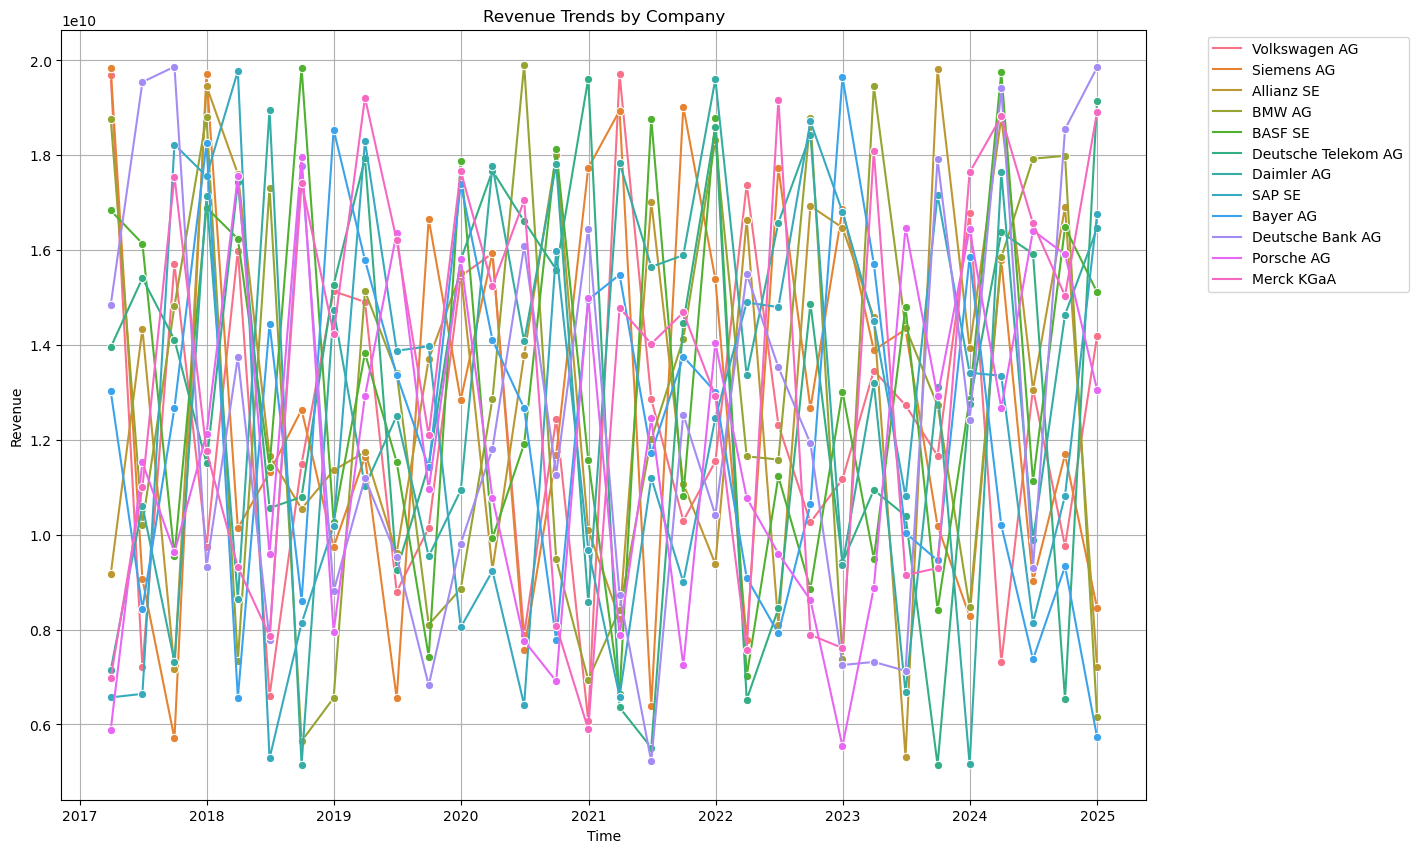

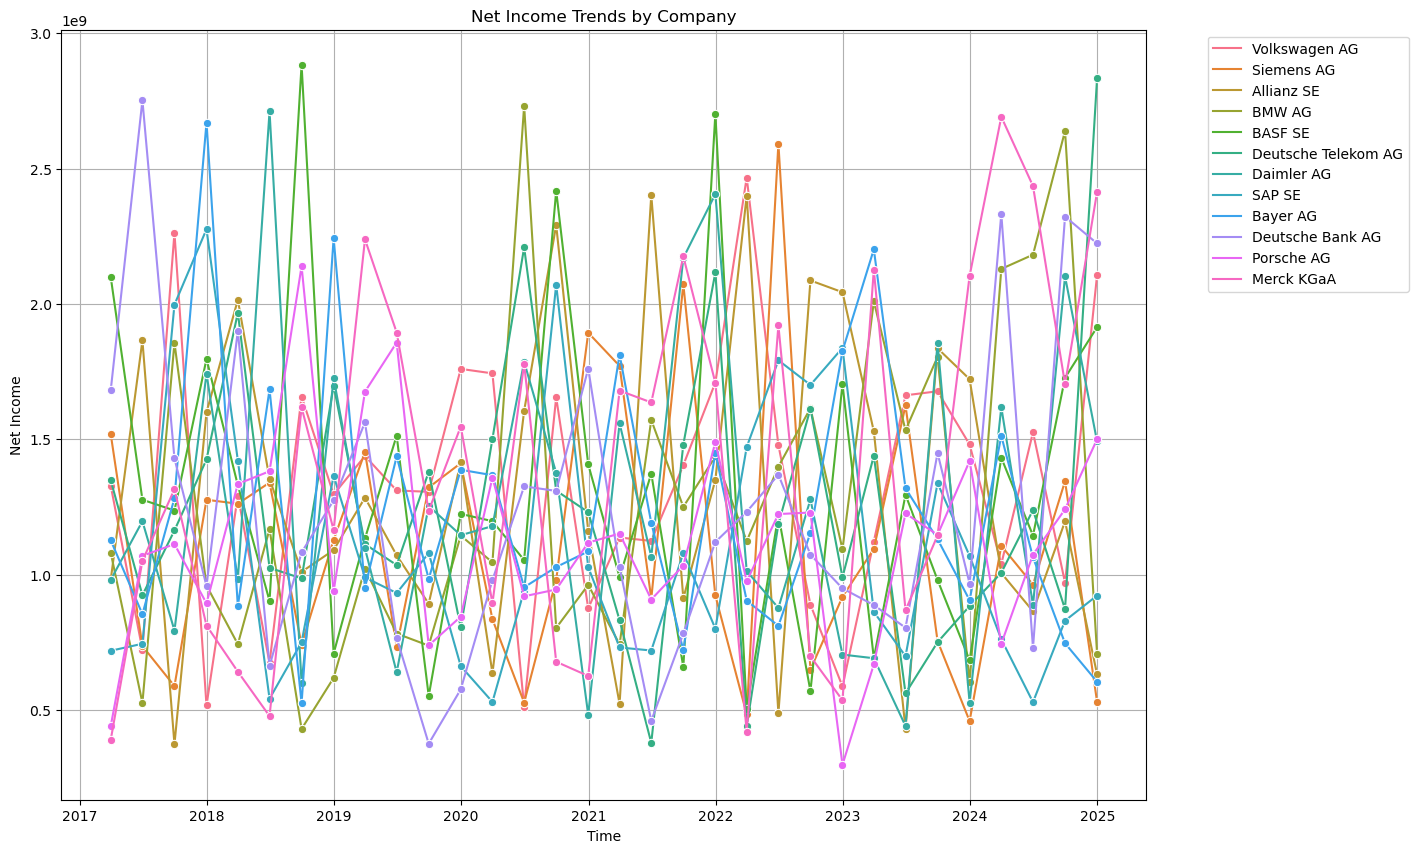

In [11]:
#Company-Specific Revenue Trends
plt.figure(figsize=(14, 10))
sns.lineplot(data=data, x='Period', y='Revenue', hue='Company', marker='o')
plt.title("Revenue Trends by Company")
plt.xlabel("Time")
plt.ylabel("Revenue")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


#Net Income Trends by Company
plt.figure(figsize=(14, 10))
sns.lineplot(data=data, x='Period', y='Net Income', hue='Company', marker='o')
plt.title("Net Income Trends by Company")
plt.xlabel("Time")
plt.ylabel("Net Income")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

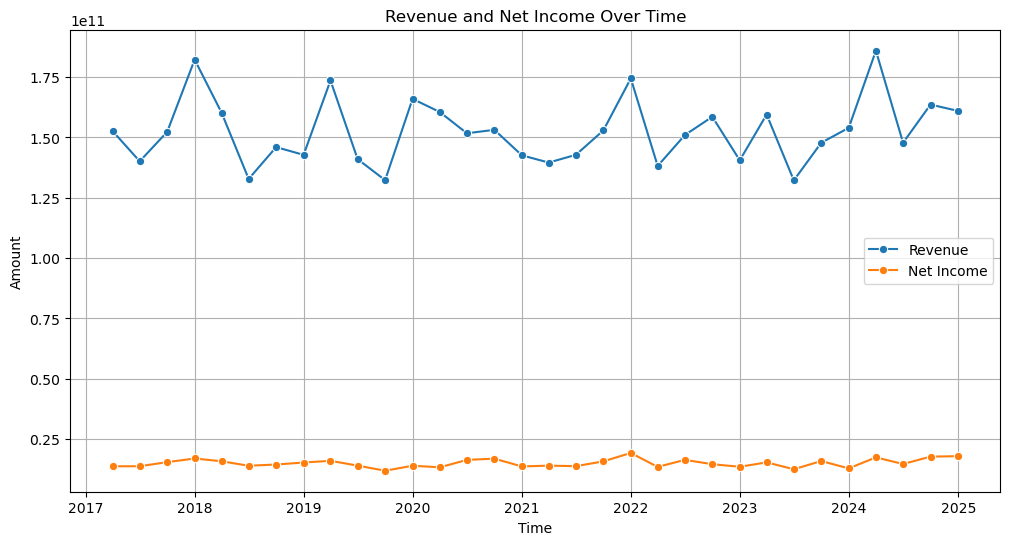

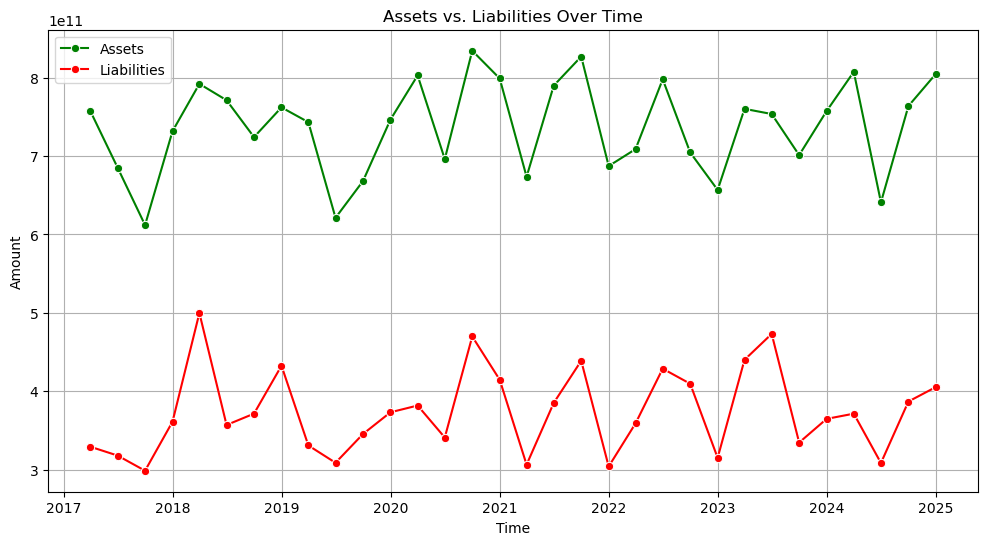

In [12]:
#Time-Series Plot for Revenue and Net Income
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_series_data, x='Period', y='Revenue', label='Revenue', marker='o')
sns.lineplot(data=time_series_data, x='Period', y='Net Income', label='Net Income', marker='o')
plt.title("Revenue and Net Income Over Time")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend()
plt.grid(True)
plt.show()


# Assets vs. Liabilities Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_series_data, x='Period', y='Assets', label='Assets', marker='o', color='green')
sns.lineplot(data=time_series_data, x='Period', y='Liabilities', label='Liabilities', marker='o', color='red')
plt.title("Assets vs. Liabilities Over Time")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
data['ROA (%)'] = pd.to_numeric(data['ROA (%)'].str.replace('.', '', regex=True), errors='coerce')
data['ROE (%)'] = pd.to_numeric(data['ROE (%)'].str.replace('.', '', regex=True), errors='coerce')
data['Debt to Equity'] = pd.to_numeric(data['Debt to Equity'].str.replace('.', '', regex=True), errors='coerce')
data['percentage  Debt to Equity'] = pd.to_numeric(data['percentage  Debt to Equity'].str.replace(',', '.').str.replace('%', ''), errors='coerce')

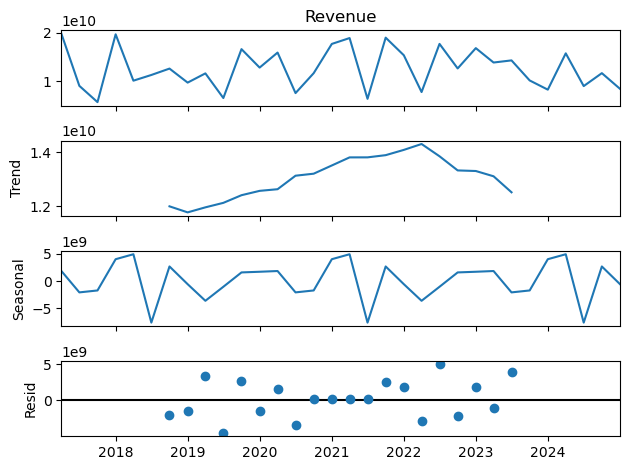

In [14]:
data['Period'] = pd.to_datetime(data['Period'], format='%m/%d/%Y')

# Filter the data for Siemens
company_data = data[data['Company'] == 'Siemens AG']

# Check if there are any valid data points for the chosen company
if company_data.empty:
    print("No data available for the specified company.")
else:
    # Set 'Period' as the index and sort the data
    company_data = company_data.set_index('Period').sort_index()

    # Check if there are enough observations (at least 24 for period=12)
    if len(company_data) >= 24:
        revenue_series = company_data['Revenue']

        # Seasonal decomposition (assuming monthly data, period=12)
        decomposition = seasonal_decompose(revenue_series, model='additive', period=12)
        decomposition.plot()
        plt.show()
    else:
        print("Not enough data points for seasonal decomposition. You need at least 24 observations.")

In [15]:
data['Year'] = data['Period'].dt.year
data['Quarter'] = data['Period'].dt.quarter
data['Revenue Growth'] = data.groupby('Company')['Revenue'].pct_change()


In [16]:
X = company_data.drop(columns=['Revenue'])  # Features
y = company_data['Revenue']  # Target

# Identify numeric and categorical columns
numeric_columns = X.select_dtypes(include=['number']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Create a transformer for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Impute missing values for numeric data
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Impute missing for categorical data
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding for categorical data
])

# Create a column transformer to apply appropriate transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create a pipeline that first preprocesses the data and then fits the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)


c:\Users\Techno Shield\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['ROA (%)' 'ROE (%)' 'Debt to Equity']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\Techno Shield\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['ROA (%)' 'ROE (%)' 'Debt to Equity']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [17]:
# Evaluate model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-Squared:", r2_score(y_test, y_pred))

Mean Absolute Error: 3820101019.1414285
Mean Squared Error: 1.714893420620009e+19
R-Squared: -0.20577416800889226


In [18]:
# Ensure 'Period' column is correctly parsed as datetime
data['Period'] = pd.to_datetime(data['Period'], format='%m/%d/%Y')

# Filter Siemens data and set 'Period' as the index
company_data = data[data['Company'] == 'Siemens AG']
company_data = company_data.set_index('Period').sort_index()


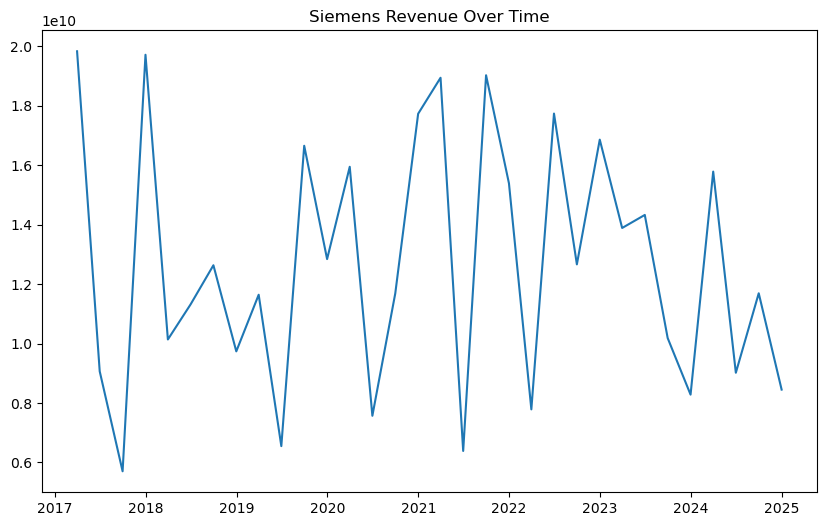

c:\Users\Techno Shield\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\Techno Shield\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\Techno Shield\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\Techno Shield\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\Techno Shield\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was

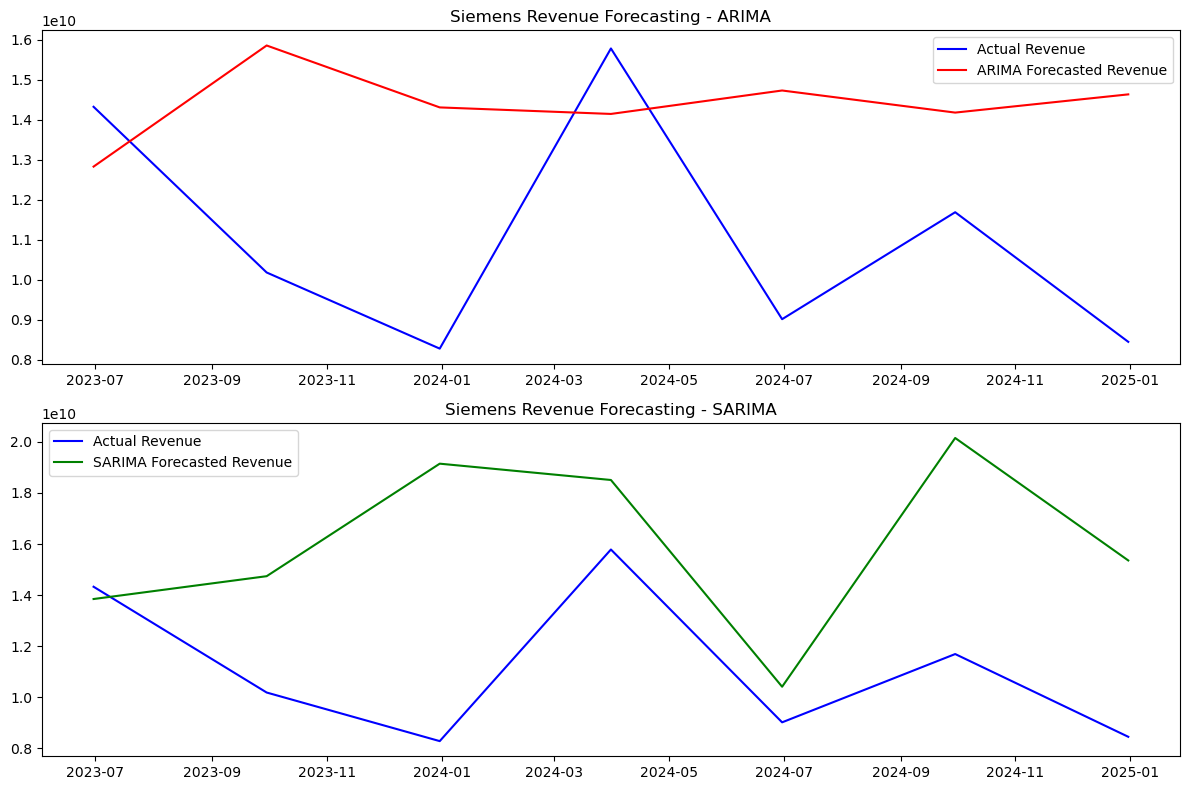

ARIMA RMSE: 4638882250.345971
SARIMA RMSE: 6183422134.305456


In [19]:

# Check if the data is empty after filtering
if company_data.empty:
    print("No data available for Siemens.")
else:
    # Fill missing values if needed (forward fill for simplicity)
    company_data['Revenue'] = company_data['Revenue'].fillna(method='ffill')

    # Plot the Revenue to inspect
    plt.figure(figsize=(10, 6))
    plt.plot(company_data['Revenue'])
    plt.title('Siemens Revenue Over Time')
    plt.show()

    # Split the data into training and testing datasets
    train_size = int(len(company_data) * 0.8)
    train, test = company_data['Revenue'][:train_size], company_data['Revenue'][train_size:]

    # --- ARIMA Model ---
    arima_model = ARIMA(train, order=(5, 1, 0))  # AR(5), I(1), MA(0)
    arima_model_fit = arima_model.fit()

    # Forecasting using ARIMA
    arima_forecast = arima_model_fit.forecast(steps=len(test))

    # --- SARIMA Model ---
    sarima_model = SARIMAX(train, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))  # Example seasonal parameters (P, D, Q, S)
    sarima_model_fit = sarima_model.fit()

    # Forecasting using SARIMA
    sarima_forecast = sarima_model_fit.forecast(steps=len(test))

    # Plot the results for comparison
    plt.figure(figsize=(12, 8))

    # Actual vs ARIMA Forecast
    plt.subplot(2, 1, 1)
    plt.plot(test.index, test, color='blue', label='Actual Revenue')
    plt.plot(test.index, arima_forecast, color='red', label='ARIMA Forecasted Revenue')
    plt.title('Siemens Revenue Forecasting - ARIMA')
    plt.legend()

    # Actual vs SARIMA Forecast
    plt.subplot(2, 1, 2)
    plt.plot(test.index, test, color='blue', label='Actual Revenue')
    plt.plot(test.index, sarima_forecast, color='green', label='SARIMA Forecasted Revenue')
    plt.title('Siemens Revenue Forecasting - SARIMA')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # --- Evaluation ---
    # Evaluate the ARIMA model
    arima_mse = mean_squared_error(test, arima_forecast)
    arima_rmse = arima_mse ** 0.5
    print(f'ARIMA RMSE: {arima_rmse}')

    # Evaluate the SARIMA model
    sarima_mse = mean_squared_error(test, sarima_forecast)
    sarima_rmse = sarima_mse ** 0.5
    print(f'SARIMA RMSE: {sarima_rmse}')